## Test processing to show ensemble mean trends in surface temperature time series

Directory with pre-processed ensemble mean data:

CMIP6: /glade/scratch/rwills/cmip6_ensembles/

CMIP5: /glade/collections/cdg/data/CLIVAR_LE/

## Setup
### load required packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np
# from scipy.io import netcdf
# import scipy.stats as stats
import pandas as pd

import xarray as xr
# import random
import os
from pprint import pprint
from tqdm import tqdm

In [2]:
# directories with SMILE output
basedir_MMLEA = '/glade/collections/cdg/data/CLIVAR_LE/'
basedir_cmip6_ensembles = '/glade/scratch/rwills/cmip6_ensembles/'
basedir_cmip5_ensembles = '/glade/scratch/rwills/cmip5_ensembles/'

# directories with processed output
basedir_processed_MMLEA = '/glade/scratch/milinski/SMILEs/'

# directory for saving plots
plotdir = '/glade/scratch/samantha/plots/ENSOworkshop/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    
# window for rolling mean
windlen=60         # 5 years

# colors for plots
cols=['blue','red','green','black']


## Locate ensemble mean data

In [3]:
[f for f in os.listdir(basedir_cmip6_ensembles) if not f.startswith(('.'))]

['model_variants',
 'ec-earth3_lens',
 'ukesm1_lens',
 'giss_e21h_lens',
 'cnrm_cm6_lens',
 'miroc6_lens',
 'native_grid',
 'norcpm1_lens',
 'unsorted',
 'cesm2_lens',
 'canesm5_lens',
 'access_lens',
 'giss_e21g_lens',
 'miroc_esm2l_lens',
 'ipsl_cm6a_lens']

In [4]:
models = [f for f in os.listdir(basedir_cmip6_ensembles) if not f.startswith(('.','model_variants','native_grid','unsorted'))]
print(models)

['ec-earth3_lens', 'ukesm1_lens', 'giss_e21h_lens', 'cnrm_cm6_lens', 'miroc6_lens', 'norcpm1_lens', 'cesm2_lens', 'canesm5_lens', 'access_lens', 'giss_e21g_lens', 'miroc_esm2l_lens', 'ipsl_cm6a_lens']


### Read in directories with ensemble mean data

In [5]:
mods2use = []

for m in models:
    if os.path.exists(basedir_cmip6_ensembles+m+'/Omon/tos/ensemble_means'):
        mods2use.append(m)

print(mods2use)


['miroc6_lens', 'canesm5_lens', 'ipsl_cm6a_lens']


The above are the CMIP6 models for which ensemble mean SST has been computed. 

Now do the same for CMIP5:


In [16]:
cmip5models = [f for f in os.listdir(basedir_cmip5_ensembles) if not f.startswith(('.','model_variants','native_grid','unsorted'))]

cmip5mods2use = []

for m in cmip5models:
    if os.path.exists(basedir_cmip5_ensembles+m+'/Omon/tos/ensemble_means'):
        cmip5mods2use.append(m)

print(cmip5mods2use)

['cesm1_lens', 'canesm2_lens']


## Read in ensemble mean SST data

Now to read in the data. I'll read in both the historical and SSP portion of each ensemble mean, and plot time series averaged over different regions:

"Eastern Pacific": 5S-5N, 210-270E
"Western Pacific": 5S-5N, 120-180E

In [15]:
histepac=[]
histwpac=[]

for m in mods2use:
    f=os.listdir(basedir_cmip6_ensembles+m+'/Omon/tos/ensemble_means/')
    if "canesm5" in m:
        hfiles=[h for h in f if "historical_ensmean_p1" in h]
        hfiles2=[h for h in f if "historical_ensmean_p2" in h]
    else:
        hfiles=[h for h in f if "historical" in h]
    print(hfiles)
        
    for hf in hfiles:
        mytos=xr.open_dataset(basedir_cmip6_ensembles+m+'/Omon/tos/ensemble_means/'+hf).tos.squeeze()
        # Eastern Pacific
        mask_lon = (mytos.lon >= 210) & (mytos.lon <= 270)
        mask_lat = (mytos.lat >= -5) & (mytos.lat <= 5)
        histepac.append(mytos.where(mask_lon & mask_lat, drop=True).mean('lat').mean('lon'))
        
        # Western Pacific
        mask_lon = (mytos.lon >= 120) & (mytos.lon <= 180)
        histwpac.append(mytos.where(mask_lon & mask_lat, drop=True).mean('lat').mean('lon'))

    if "canesm5" in m:
        print(hfiles2[0])
        mytos=xr.open_dataset(basedir_cmip6_ensembles+m+'/Omon/tos/ensemble_means/'+hfiles2[0]).tos.squeeze()
        # Eastern Pacific
        mask_lon = (mytos.lon >= 210) & (mytos.lon <= 270)
        mask_lat = (mytos.lat >= -5) & (mytos.lat <= 5)
        histepac.append(mytos.where(mask_lon & mask_lat, drop=True).mean('lat').mean('lon'))
        
        # Western Pacific
        mask_lon = (mytos.lon >= 120) & (mytos.lon <= 180)
        histwpac.append(mytos.where(mask_lon & mask_lat, drop=True).mean('lat').mean('lon'))
        

['tos_mon_MIROC6_historical_ensmean_50members_g025.nc']
['tos_mon_CanESM5_historical_ensmean_p1_25members_g025.nc']
tos_mon_CanESM5_historical_ensmean_p2_40members_g025.nc
['tos_mon_IPSL-CM6A-LR_historical_ensmean_30members_g025.nc']


Now do the same thing, but for the SSP portion of the simulation.

In [8]:
sspepac=[]
sspwpac=[]

for m in mods2use:
    f=os.listdir(basedir_cmip6_ensembles+m+'/Omon/tos/ensemble_means/')
    if "canesm5" in m:
        hfiles=[h for h in f if "ssp585_ensmean_p1" in h]
        hfiles2=[h for h in f if "ssp585_ensmean_p2" in h]
    else:
        hfiles=[h for h in f if "ssp" in h]
        
    print(hfiles)
        
    for hf in hfiles:
        mytos=xr.open_dataset(basedir_cmip6_ensembles+m+'/Omon/tos/ensemble_means/'+hf).tos.squeeze()
        # Eastern Pacific
        mask_lon = (mytos.lon >= 210) & (mytos.lon <= 270)
        mask_lat = (mytos.lat >= -5) & (mytos.lat <= 5)
        sspepac.append(mytos.where(mask_lon & mask_lat, drop=True).mean('lat').mean('lon'))
        
        # Western Pacific
        mask_lon = (mytos.lon >= 120) & (mytos.lon <= 180)
        sspwpac.append(mytos.where(mask_lon & mask_lat, drop=True).mean('lat').mean('lon'))
        
    if "canesm5" in m:
        print(hfiles2[0])
        mytos=xr.open_dataset(basedir_cmip6_ensembles+m+'/Omon/tos/ensemble_means/'+hfiles2[0]).tos.squeeze()
        # Eastern Pacific
        mask_lon = (mytos.lon >= 210) & (mytos.lon <= 270)
        mask_lat = (mytos.lat >= -5) & (mytos.lat <= 5)
        sspepac.append(mytos.where(mask_lon & mask_lat, drop=True).mean('lat').mean('lon'))
        
        # Western Pacific
        mask_lon = (mytos.lon >= 120) & (mytos.lon <= 180)
        sspwpac.append(mytos.where(mask_lon & mask_lat, drop=True).mean('lat').mean('lon'))
        
print(sspepac)

['tos_mon_MIROC6_ssp585_ensmean_50members_g025.nc']
['tos_mon_CanESM5_ssp585_ensmean_p1_25members_g025.nc']
tos_mon_CanESM5_ssp585_ensmean_p2_25members_g025.nc
['tos_mon_IPSL-CM6A-LR_ssp370_ensmean_11members_g025.nc']
[<xarray.DataArray 'tos' (time: 1032)>
array([25.51749347, 26.14865495, 26.75295991, ..., 28.48703264,
       28.49135861, 28.72723577])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00, <xarray.DataArray 'tos' (time: 1032)>
array([26.92834999, 26.62485621, 26.86521733, ..., 30.8279331 ,
       31.15526196, 31.73674026])
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00, <xarray.DataArray 'tos' (time: 1032)>
array([27.00850051, 26.77345155, 26.86852263, ..., 30.62543343,
       30.97197239, 31.61257381])
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00, <xarray.DataArray 'tos' (time: 1032)>
array([25.48639536, 26.15352932, 27.22455794, ..., 27.52010735,
       2

## Concatenate historical, SSP data

In order to do a running mean, it's best to concatenate the two time periods in order to get rid of end effects.

In [9]:
fullepac=[]
fullwpac=[]
fullgrad=[]

for m in range(len(mods2use)+1):
    print(m)
    tmpe=xr.concat([histepac[m],sspepac[m]],dim='time')
    tmpw=xr.concat([histwpac[m],sspwpac[m]],dim='time')
    tmpgrad=tmpw-tmpe
    
    fullepac.append(tmpe.rolling(time=windlen).mean())
    fullwpac.append(tmpw.rolling(time=windlen).mean())
    fullgrad.append(tmpgrad.rolling(time=windlen).mean())
  
print(fullepac)

0
1
2
3
[<xarray.DataArray 'tos' (time: 3012)>
array([        nan,         nan,         nan, ..., 29.1436787 ,
       29.15105486, 29.15862913])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2100-12-16T12:00:00, <xarray.DataArray 'tos' (time: 3012)>
array([        nan,         nan,         nan, ..., 31.68674225,
       31.68954764, 31.69271625])
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00, <xarray.DataArray 'tos' (time: 3012)>
array([        nan,         nan,         nan, ..., 31.56709654,
       31.57355404, 31.58049717])
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00, <xarray.DataArray 'tos' (time: 3012)>
array([        nan,         nan,         nan, ..., 28.75091096,
       28.74938306, 28.74930158])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2100-12-16T12:00:00]


Next: make time series of regional trends from the ensemble mean data to determine what the temporal evolution looks like. Per Sebastian's example: need to make a new time array in order to plot with matplotlib, since it doesn't work with the cftime._cftime.DatetimeNoLeap format

In [10]:
plttime=fullepac[1].indexes['time'].to_datetimeindex()

/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  """Entry point for launching an IPython kernel.


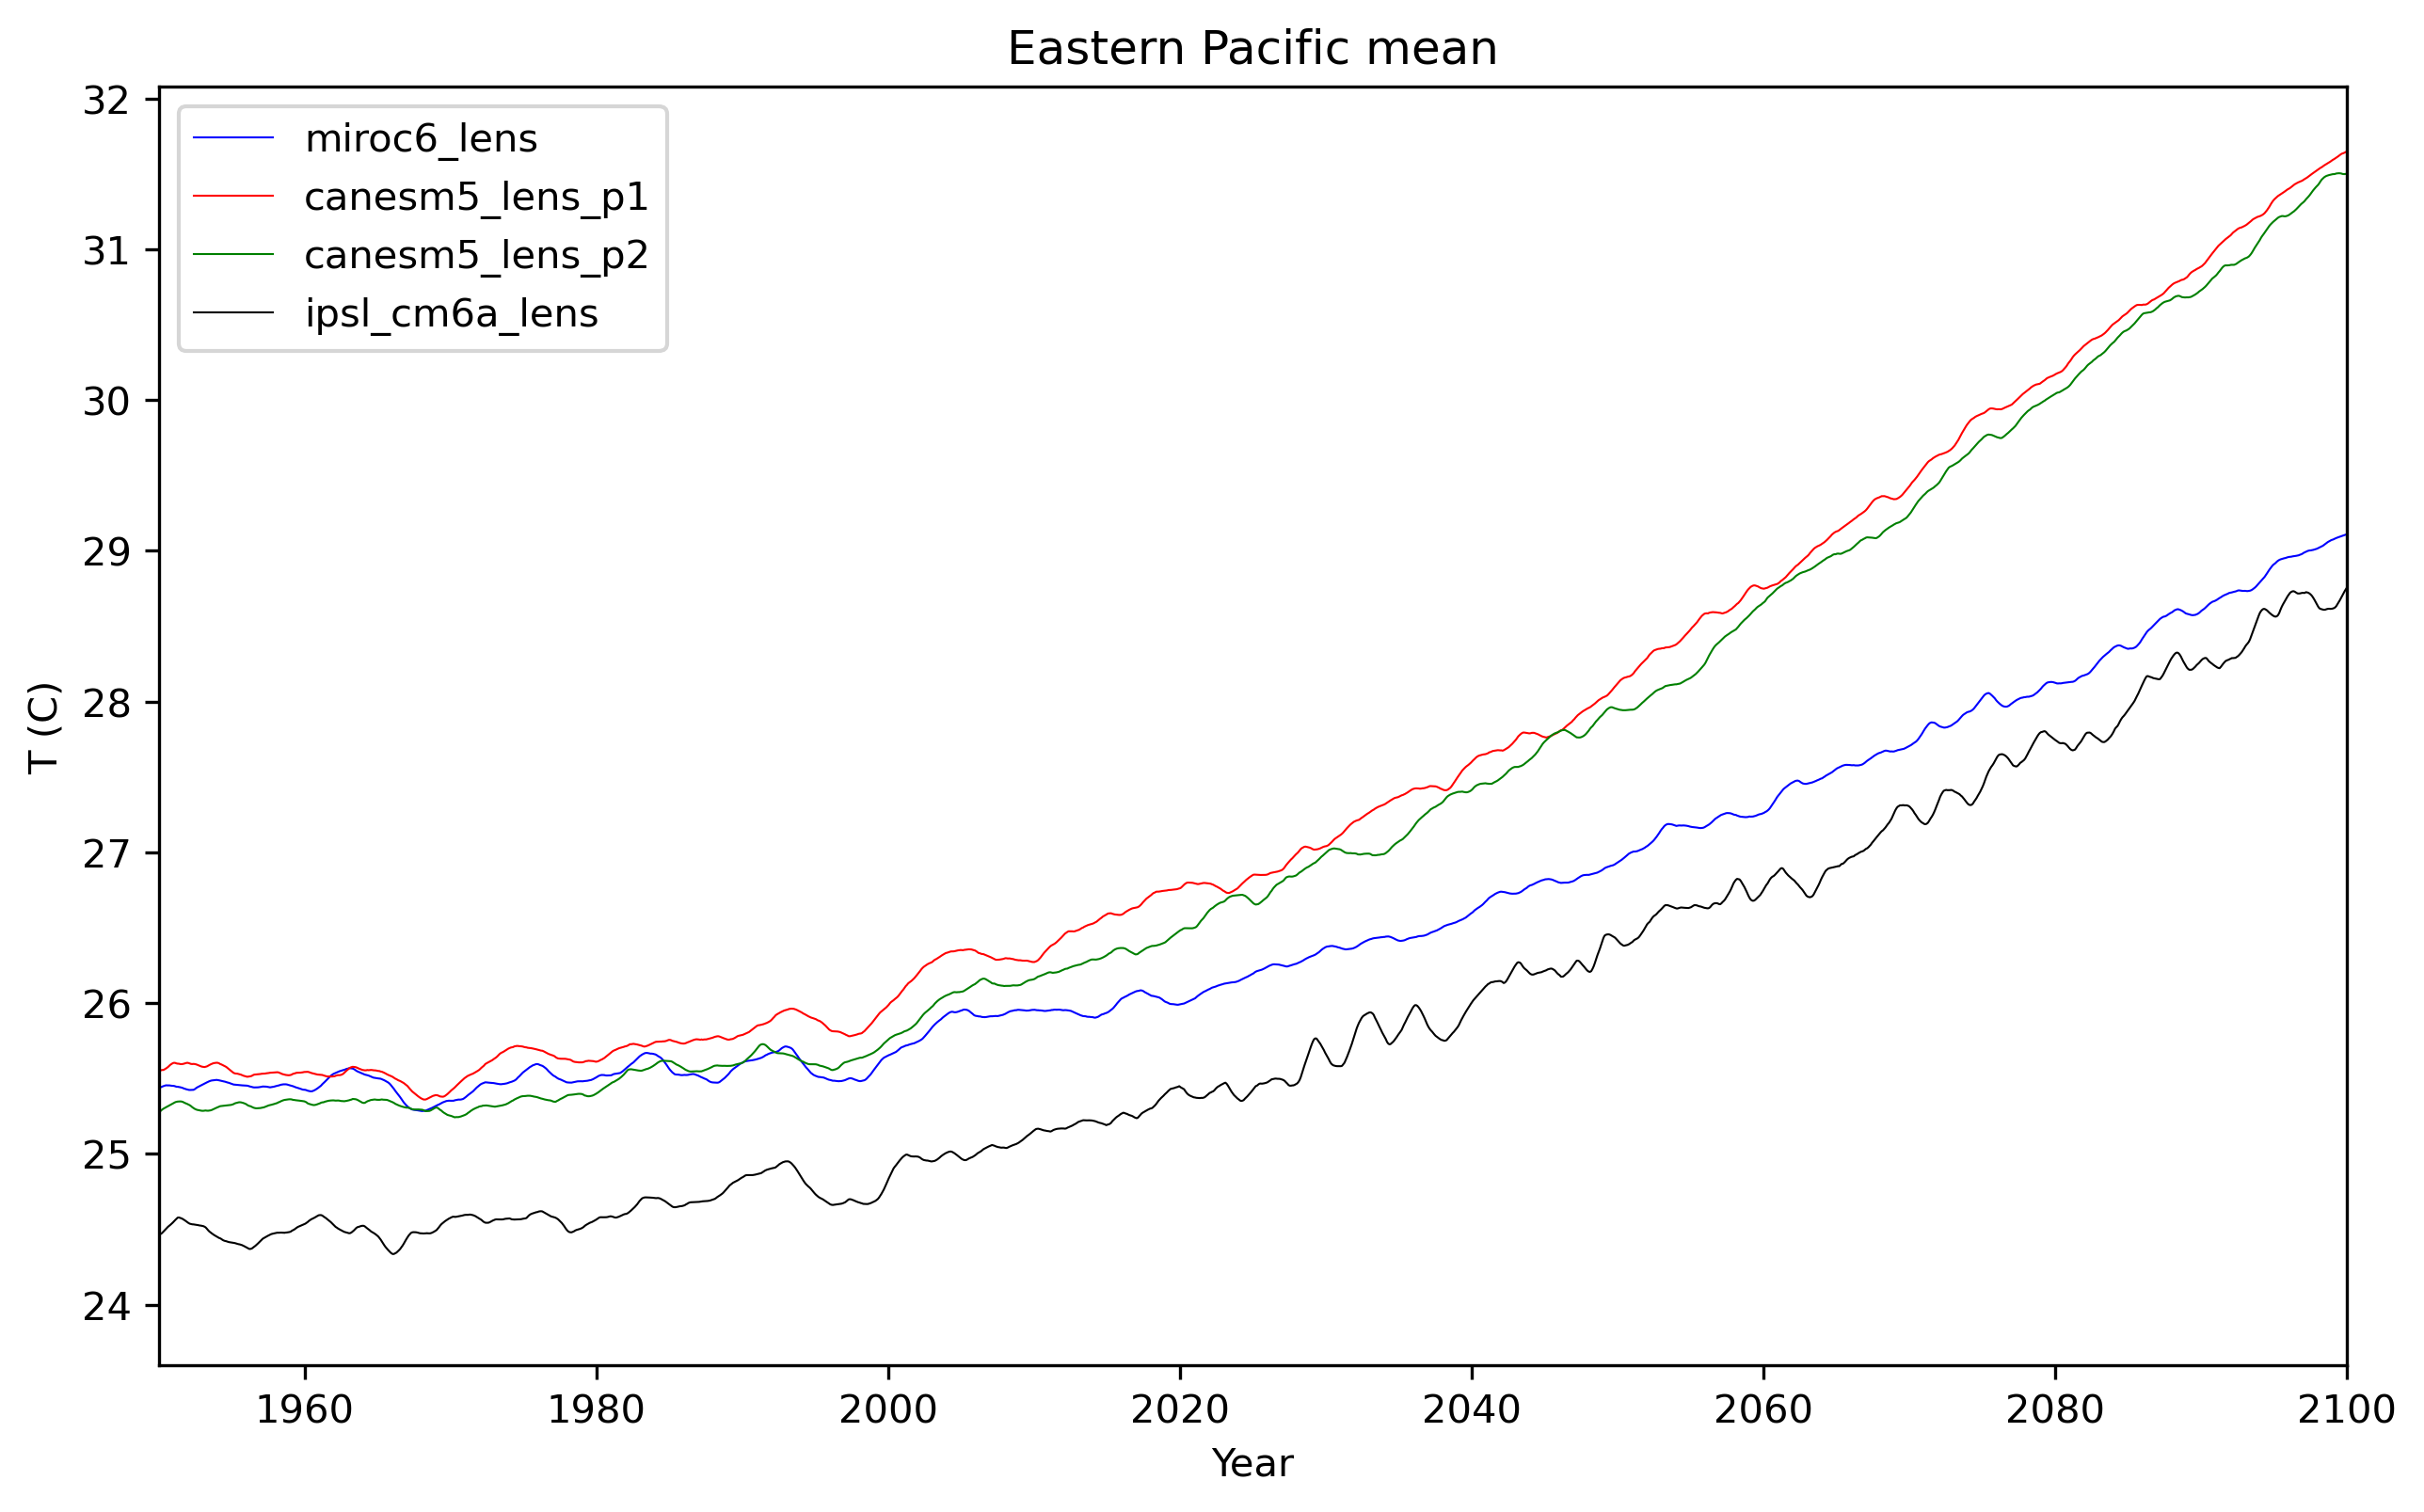

In [20]:

plt.figure(figsize=(10, 6), dpi=300)

for m in range(4):
    plt.plot(plttime,fullepac[m],color=cols[m],linewidth=0.5);

plt.title('Eastern Pacific mean')
plt.ylabel('T (C)')
plt.xlabel('Year')

import datetime as dt
plt.xlim([dt.date(1950, 1, 1), dt.date(2100,1,1)])

plt.legend(['miroc6_lens', 'canesm5_lens_p1', 'canesm5_lens_p2', 'ipsl_cm6a_lens'])
plt.savefig(plotdir+'wpac_cmip6.pdf', bbox_inches='tight', dpi=300)

# Now do the western Pacific

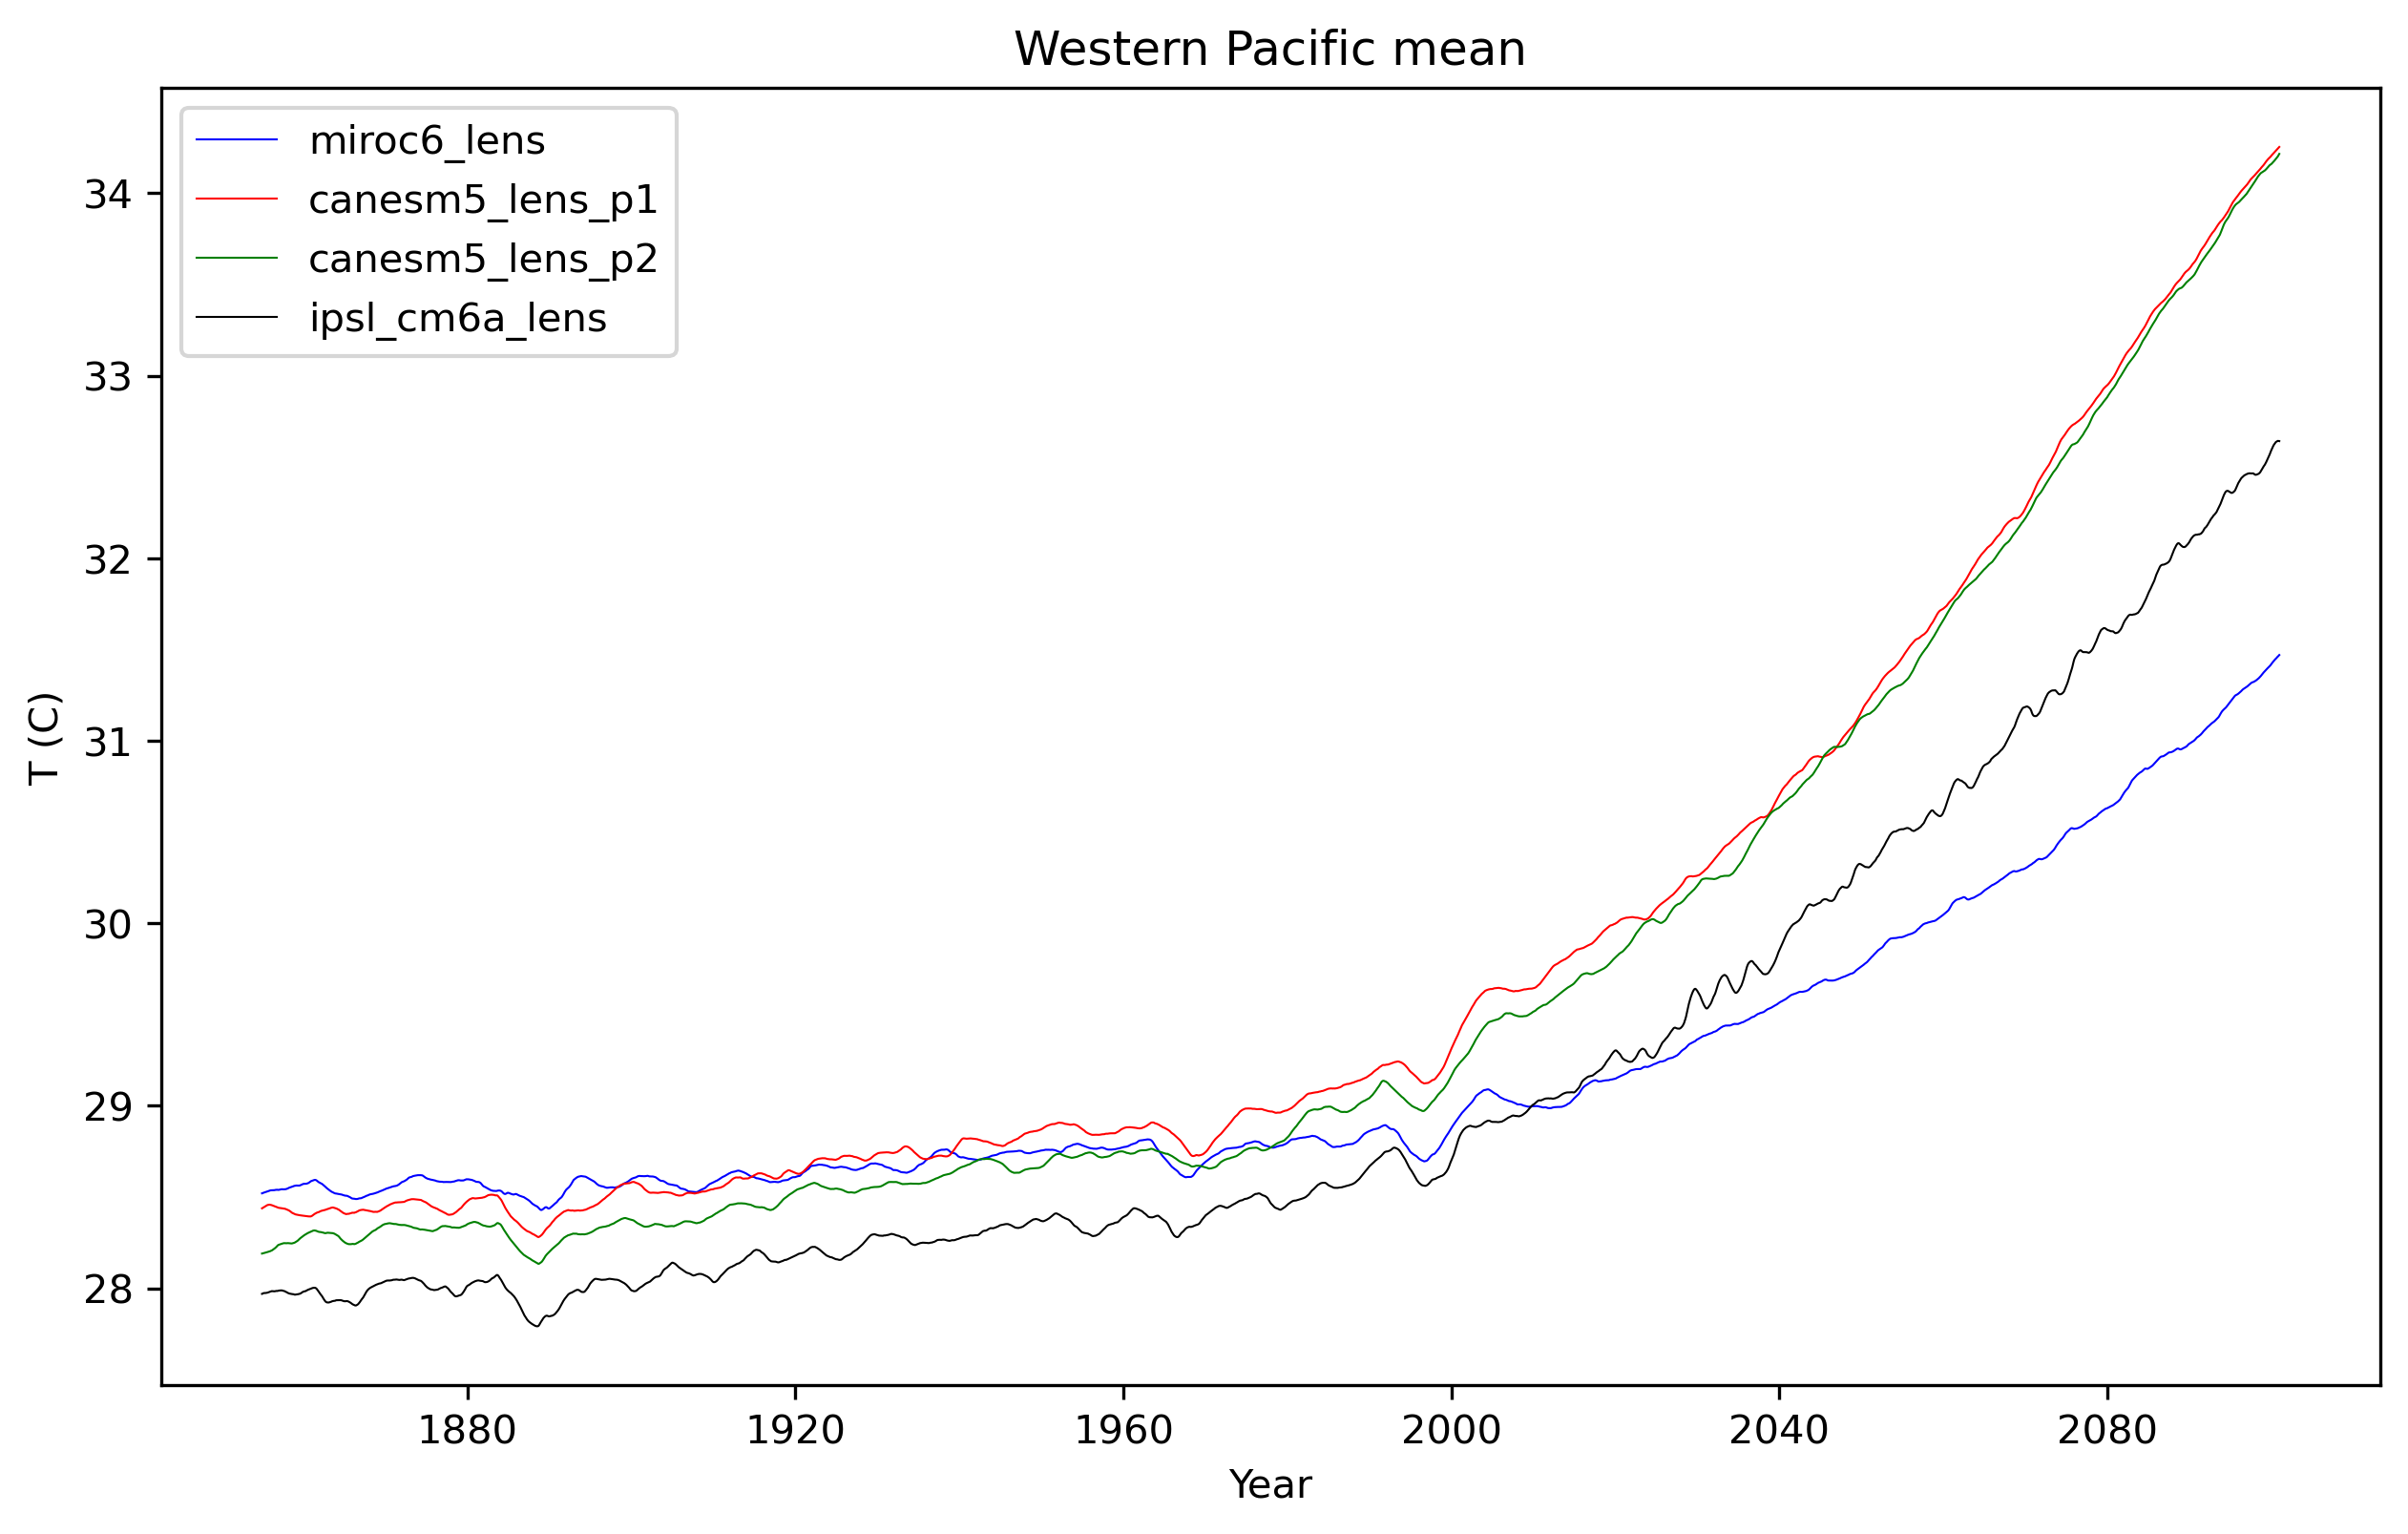

In [19]:
plt.figure(figsize=(10, 6), dpi=300)

for m in range(len(mods2use)+1):
    plt.plot(plttime,fullwpac[m],color=cols[m],linewidth=0.5);

plt.title('Western Pacific mean')
plt.ylabel('T (C)')
plt.xlabel('Year')

plt.legend(['miroc6_lens', 'canesm5_lens_p1', 'canesm5_lens_p2', 'ipsl_cm6a_lens'])
plt.savefig(plotdir+'wpac_cmip6.pdf', bbox_inches='tight', dpi=300)

# Look at the zonal gradient

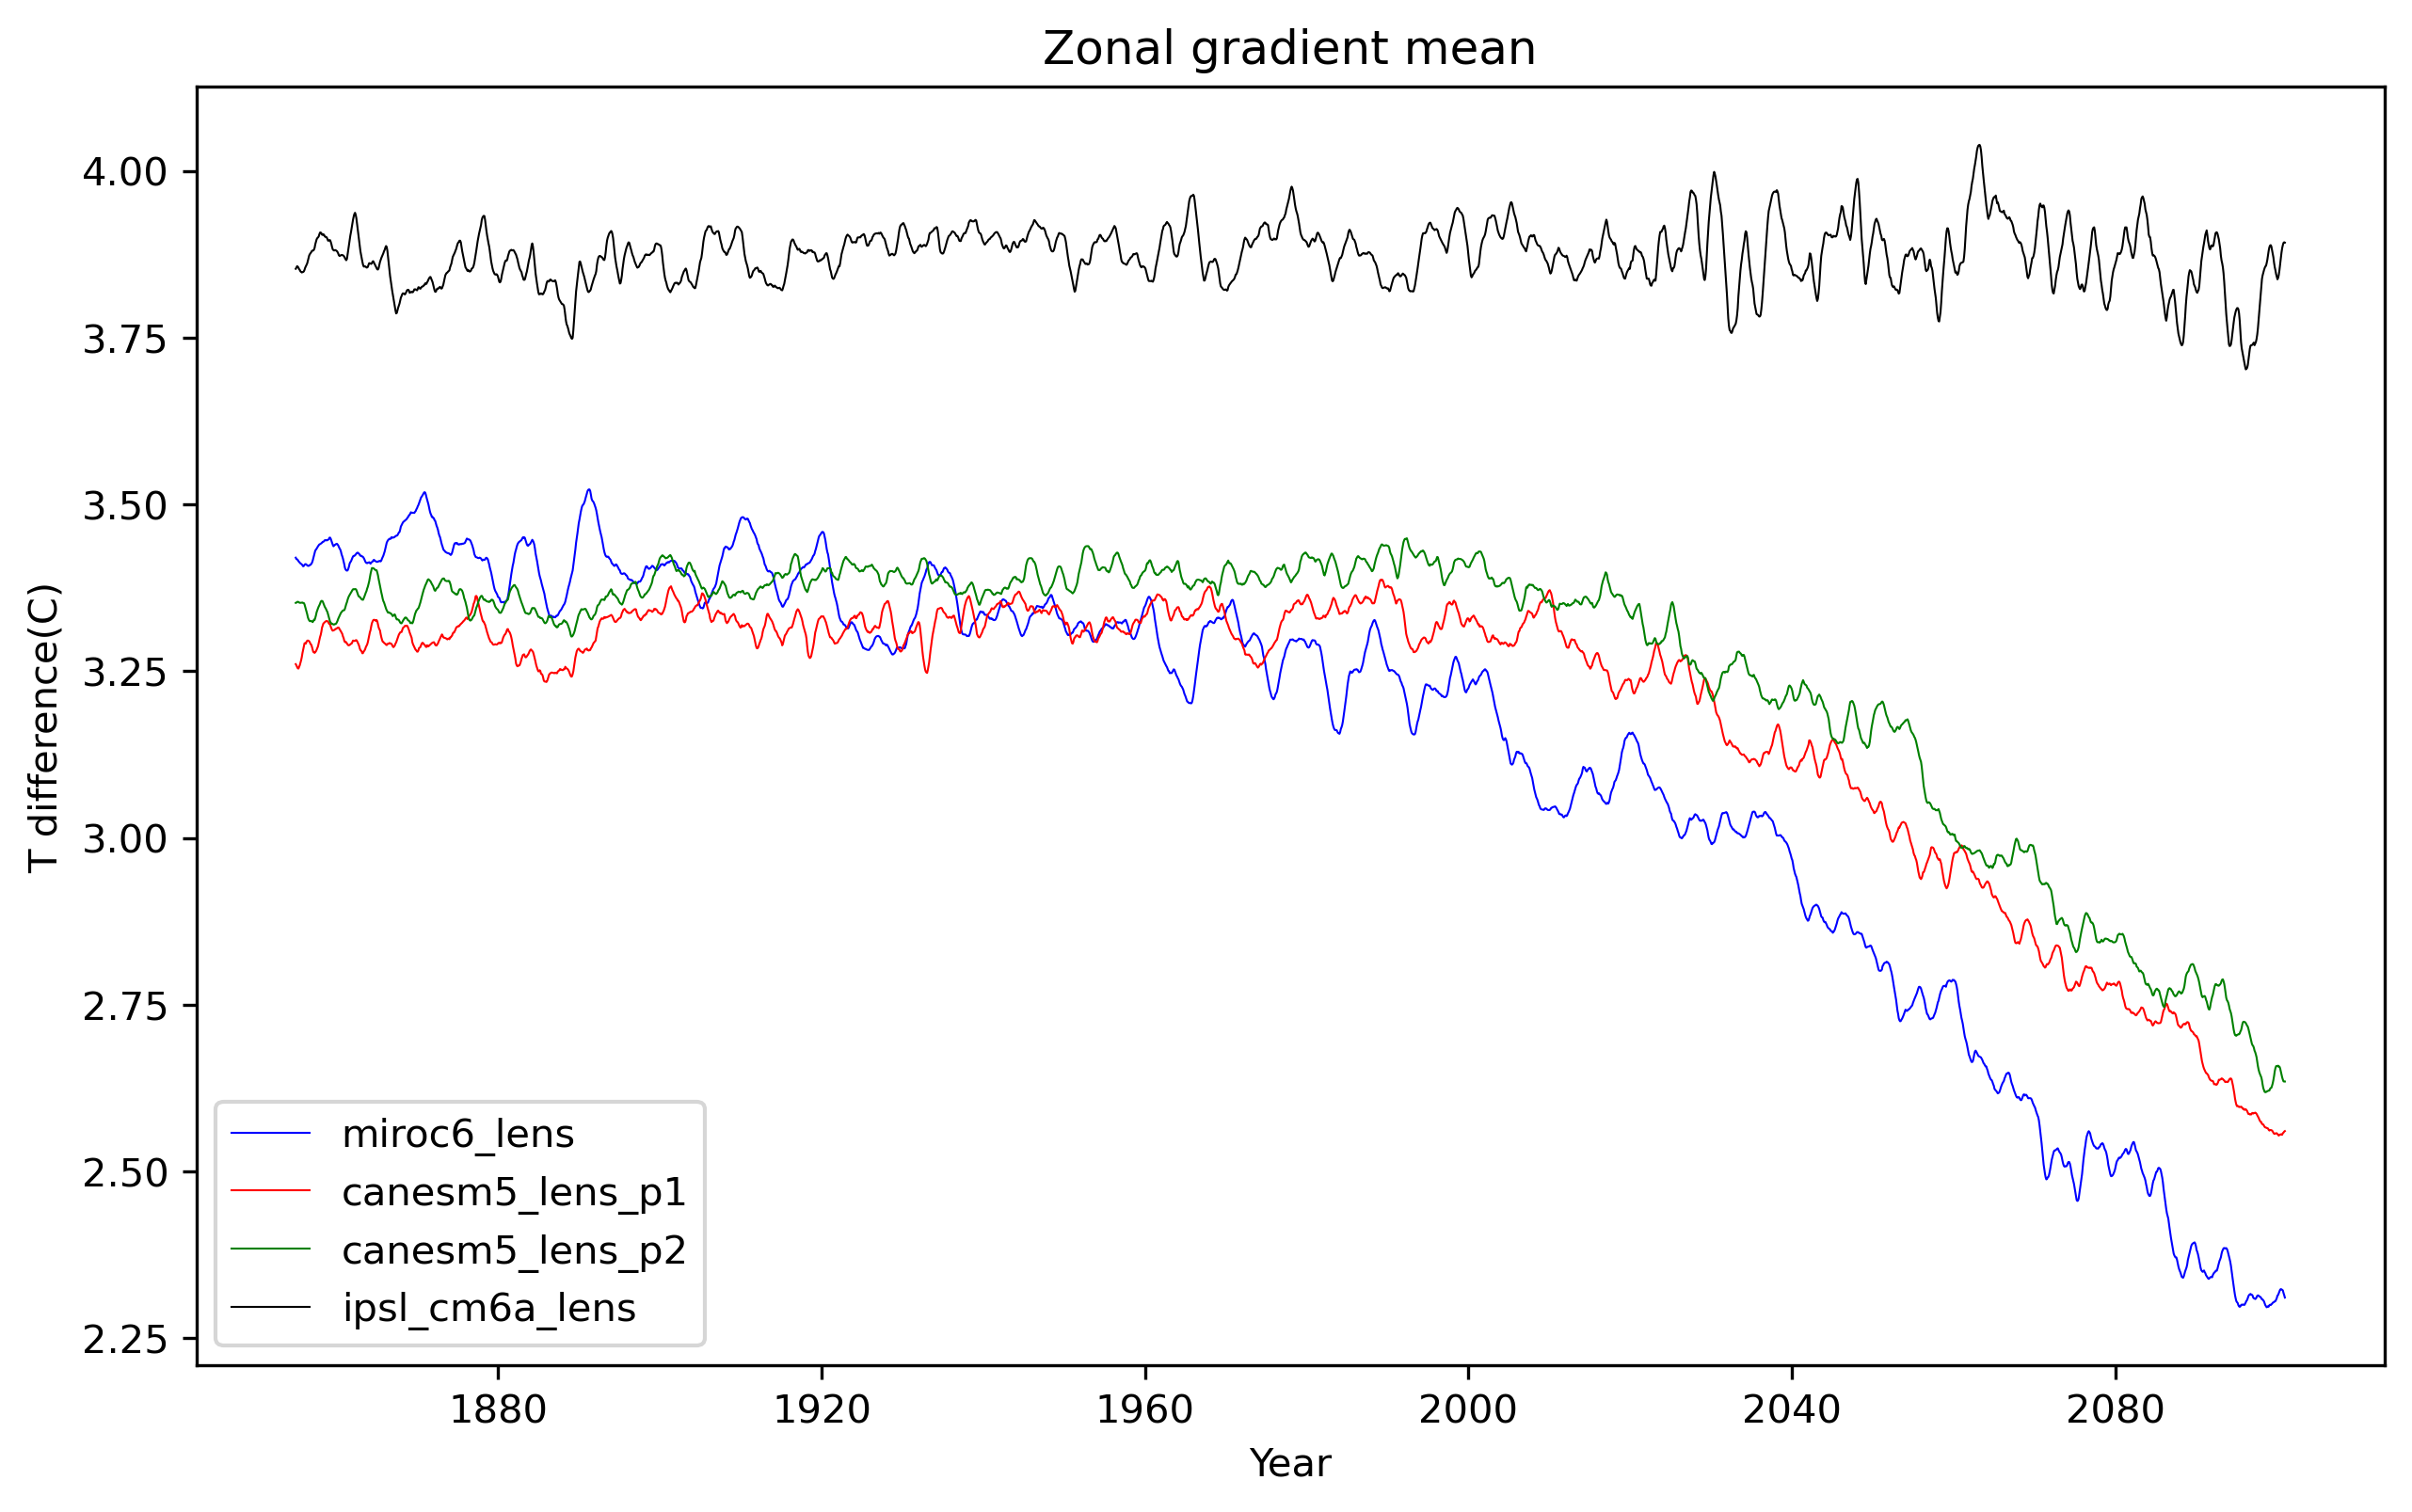

In [21]:
plt.figure(figsize=(10, 6), dpi=300)

for m in range(len(mods2use)+1):
    plt.plot(plttime,fullgrad[m],color=cols[m],linewidth=0.5);

plt.title('Zonal gradient mean')
plt.ylabel('T difference(C)')
plt.xlabel('Year')

plt.legend(['miroc6_lens', 'canesm5_lens_p1', 'canesm5_lens_p2', 'ipsl_cm6a_lens'])

plt.savefig(plotdir+'zonalgrad_cmip6.pdf', bbox_inches='tight', dpi=300)

# Other ways to visualize things